In [26]:
import cv2
import matplotlib.pyplot as plt
import csv
# Import datasets, classifiers and performance metrics
from skimage.feature import hog
from skimage.transform import resize
from sklearn import datasets, svm, metrics
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
import skimage.io as io
from commonfunctions import *
import pandas as pd
from imutils import contours as imcnts
import os
from skimage.morphology import skeletonize,thin
import statistics
import pickle

In [27]:
#variable that will help us to resize the extracted handwritten digits
RESIZED_IMAGE_WIDTH = 30
RESIZED_IMAGE_HEIGHT= 40

In [28]:
loaded_svc = pickle.load(open('SVC.sav', 'rb'))
loaded_knn = pickle.load(open('KNN.sav', 'rb'))
loaded_rf = pickle.load(open('RF.sav', 'rb'))
loaded_lr = pickle.load(open('LR.sav', 'rb'))

EOFError: Ran out of input

In [29]:
def extract_hog_features(img):
    """
    TODO
    You won't implement anything in this function. You just need to understand it 
    and understand its parameters (i.e win_size, cell_size, ... etc)
    """
#     img = cv2.resize(img, target_img_size)
    win_size = (28, 28)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h

In [30]:
# digits = datasets.load_digits()

digitsHead = pd.read_csv('train.csv') 



# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, label in zip(axes, digits.images, digits.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title("Training: %i" % label)

In [31]:
digitsHead.head()
digitsHead.shape

(42000, 785)

In [32]:
# # flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))

# # Create a classifier: a support vector classifier
# clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
# X_train, X_test, y_train, y_test = train_test_split(
#     data, digits.target, test_size=0.5, shuffle=False
# )

# # Learn the digits on the train subset
# clf.fit(X_train, y_train)
# img = cv2.imread('./images/88.jpg')
# show_images([img])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img.shape)
# img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)

# show_images([img])


# # Predict the value of the digit on the test subset
# # predicted = clf.predict(img.reshape(1,-1))
# # print(predicted)

In [33]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, prediction in zip(axes, img.reshape(1,-1), predicted):
#     ax.set_axis_off()
#     image = image.reshape(8, 8)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Prediction: {prediction}")

In [34]:
trainFile = "./train.csv"
labels = []
hog_result = []
img = np.array((28, 28), dtype=np.uint8)

with open(trainFile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            labels.append(row[0])
            img = np.array(row[1:], dtype=np.uint8).reshape((28, 28))
            line_count += 1
            img = 255-img
            print(line_count)
#             show_images([img], [row[0]])
            hog_result.append(extract_hog_features(img))
            

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980


5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978


8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998


11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
1204

13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
1353

14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
1501

16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16323
16324
16325
16326
16327
16328
16329
16330
16331
16332
16333
16334
16335
16336
16337
16338
16339
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
1647

17825
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
1799

19245
19246
19247
19248
19249
19250
19251
19252
19253
19254
19255
19256
19257
19258
19259
19260
19261
19262
19263
19264
19265
19266
19267
19268
19269
19270
19271
19272
19273
19274
19275
19276
19277
19278
19279
19280
19281
19282
19283
19284
19285
19286
19287
19288
19289
19290
19291
19292
19293
19294
19295
19296
19297
19298
19299
19300
19301
19302
19303
19304
19305
19306
19307
19308
19309
19310
19311
19312
19313
19314
19315
19316
19317
19318
19319
19320
19321
19322
19323
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19334
19335
19336
19337
19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
19354
19355
19356
19357
19358
19359
19360
19361
19362
19363
19364
19365
19366
19367
19368
19369
19370
19371
19372
19373
19374
19375
19376
19377
19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
1941

20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
2097

22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
22333
22334
22335
22336
22337
22338
22339
22340
22341
22342
22343
22344
22345
22346
22347
22348
22349
22350
22351
22352
22353
22354
22355
22356
22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
2248

23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
2399

25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
2549

26847
26848
26849
26850
26851
26852
26853
26854
26855
26856
26857
26858
26859
26860
26861
26862
26863
26864
26865
26866
26867
26868
26869
26870
26871
26872
26873
26874
26875
26876
26877
26878
26879
26880
26881
26882
26883
26884
26885
26886
26887
26888
26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
2701

28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
2854

29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29992
29993
29994
29995
29996
29997
29998
29999
30000
30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30041
30042
30043
30044
30045
30046
30047
30048
30049
30050
30051
30052
30053
30054
30055
30056
30057
30058
30059
30060
30061
30062
30063
30064
30065
30066
30067
30068
30069
30070
30071
30072
30073
30074
30075
30076
30077
30078
30079
30080
30081
30082
30083
30084
30085
30086
30087
30088
30089
30090
30091
30092
30093
30094
30095
30096
30097
30098
30099
30100
30101
30102
3010

31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581
31582
31583
31584
31585
31586
31587
31588
31589
31590
31591
31592
31593
31594
31595
31596
31597
31598
31599
31600
31601
31602
31603
31604
31605
31606
31607
31608
31609
31610
31611
31612
31613
31614
31615
31616
31617
31618
31619
31620
31621
31622
31623
31624
31625
31626
31627
31628
31629
31630
31631
31632
31633
31634
31635
31636
31637
3163

32974
32975
32976
32977
32978
32979
32980
32981
32982
32983
32984
32985
32986
32987
32988
32989
32990
32991
32992
32993
32994
32995
32996
32997
32998
32999
33000
33001
33002
33003
33004
33005
33006
33007
33008
33009
33010
33011
33012
33013
33014
33015
33016
33017
33018
33019
33020
33021
33022
33023
33024
33025
33026
33027
33028
33029
33030
33031
33032
33033
33034
33035
33036
33037
33038
33039
33040
33041
33042
33043
33044
33045
33046
33047
33048
33049
33050
33051
33052
33053
33054
33055
33056
33057
33058
33059
33060
33061
33062
33063
33064
33065
33066
33067
33068
33069
33070
33071
33072
33073
33074
33075
33076
33077
33078
33079
33080
33081
33082
33083
33084
33085
33086
33087
33088
33089
33090
33091
33092
33093
33094
33095
33096
33097
33098
33099
33100
33101
33102
33103
33104
33105
33106
33107
33108
33109
33110
33111
33112
33113
33114
33115
33116
33117
33118
33119
33120
33121
33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
33132
33133
33134
33135
33136
33137
33138
33139
3314

34469
34470
34471
34472
34473
34474
34475
34476
34477
34478
34479
34480
34481
34482
34483
34484
34485
34486
34487
34488
34489
34490
34491
34492
34493
34494
34495
34496
34497
34498
34499
34500
34501
34502
34503
34504
34505
34506
34507
34508
34509
34510
34511
34512
34513
34514
34515
34516
34517
34518
34519
34520
34521
34522
34523
34524
34525
34526
34527
34528
34529
34530
34531
34532
34533
34534
34535
34536
34537
34538
34539
34540
34541
34542
34543
34544
34545
34546
34547
34548
34549
34550
34551
34552
34553
34554
34555
34556
34557
34558
34559
34560
34561
34562
34563
34564
34565
34566
34567
34568
34569
34570
34571
34572
34573
34574
34575
34576
34577
34578
34579
34580
34581
34582
34583
34584
34585
34586
34587
34588
34589
34590
34591
34592
34593
34594
34595
34596
34597
34598
34599
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
3463

36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
3624

37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
37739
37740
37741
37742
3774

39144
39145
39146
39147
39148
39149
39150
39151
39152
39153
39154
39155
39156
39157
39158
39159
39160
39161
39162
39163
39164
39165
39166
39167
39168
39169
39170
39171
39172
39173
39174
39175
39176
39177
39178
39179
39180
39181
39182
39183
39184
39185
39186
39187
39188
39189
39190
39191
39192
39193
39194
39195
39196
39197
39198
39199
39200
39201
39202
39203
39204
39205
39206
39207
39208
39209
39210
39211
39212
39213
39214
39215
39216
39217
39218
39219
39220
39221
39222
39223
39224
39225
39226
39227
39228
39229
39230
39231
39232
39233
39234
39235
39236
39237
39238
39239
39240
39241
39242
39243
39244
39245
39246
39247
39248
39249
39250
39251
39252
39253
39254
39255
39256
39257
39258
39259
39260
39261
39262
39263
39264
39265
39266
39267
39268
39269
39270
39271
39272
39273
39274
39275
39276
39277
39278
39279
39280
39281
39282
39283
39284
39285
39286
39287
39288
39289
39290
39291
39292
39293
39294
39295
39296
39297
39298
39299
39300
39301
39302
39303
39304
39305
39306
39307
39308
39309
3931

40645
40646
40647
40648
40649
40650
40651
40652
40653
40654
40655
40656
40657
40658
40659
40660
40661
40662
40663
40664
40665
40666
40667
40668
40669
40670
40671
40672
40673
40674
40675
40676
40677
40678
40679
40680
40681
40682
40683
40684
40685
40686
40687
40688
40689
40690
40691
40692
40693
40694
40695
40696
40697
40698
40699
40700
40701
40702
40703
40704
40705
40706
40707
40708
40709
40710
40711
40712
40713
40714
40715
40716
40717
40718
40719
40720
40721
40722
40723
40724
40725
40726
40727
40728
40729
40730
40731
40732
40733
40734
40735
40736
40737
40738
40739
40740
40741
40742
40743
40744
40745
40746
40747
40748
40749
40750
40751
40752
40753
40754
40755
40756
40757
40758
40759
40760
40761
40762
40763
40764
40765
40766
40767
40768
40769
40770
40771
40772
40773
40774
40775
40776
40777
40778
40779
40780
40781
40782
40783
40784
40785
40786
40787
40788
40789
40790
40791
40792
40793
40794
40795
40796
40797
40798
40799
40800
40801
40802
40803
40804
40805
40806
40807
40808
40809
40810
4081

In [35]:
hog_features = np.array(hog_result)
labels = np.array(labels)

In [36]:
print(hog_features.shape)

(42000, 1296)


In [37]:
train, test,train_labels, test_labels = train_test_split(hog_features, labels, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

data = pd.DataFrame(np.array(train_labels))
data.value_counts()

Train Data Shape:  (33600, 1296)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 1296)
Test Label Shape:  (8400,)


1    3775
7    3508
3    3414
6    3352
9    3350
2    3331
0    3316
4    3233
8    3228
5    3093
dtype: int64

In [38]:
clf = svm.SVC(max_iter=100)

In [39]:
clf.fit(train, train_labels)
svm_predictions = clf.predict(test)
score = clf.score(test, test_labels)*100


print('SVM:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

C:\Users\Mido\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM:
Accuracy:  99.0%


In [40]:
filename = 'SVC.sav'
pickle.dump(clf, open(filename, 'wb'))

In [41]:
knn = KNeighborsClassifier(n_neighbors=6, weights = 'uniform')
knn.fit(train, train_labels)
knn_predictions = knn.predict(test)
score = knn.score(test, test_labels)*100


print('KNN:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

C:\Users\Mido\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN:
Accuracy:  98.19%


C:\Users\Mido\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
filename = 'KNN.sav'
pickle.dump(knn, open(filename, 'wb'))

In [43]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=None)
rf.fit(train, train_labels)
predictions = rf.predict(test)
score = rf.score(test, test_labels)*100

print('RF:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

RF:
Accuracy:  98.35%


In [44]:
filename = 'RF.sav'
pickle.dump(rf, open(filename, 'wb'))

In [45]:
lr = LogisticRegression(warm_start=True, solver='liblinear', max_iter=100)
lr.fit(train, train_labels)
lr_predictions = lr.predict(test)
score = lr.score(test, test_labels)*100

print('LR:')
print('Accuracy: ', str(np.round(score,decimals=2))+'%')

LR:
Accuracy:  98.51%


In [46]:
filename = 'LR.sav'
pickle.dump(lr, open(filename, 'wb'))

In [47]:
svm_unique, svm_counts = np.unique(svm_predictions, return_counts=True)
knn_unique, knn_counts = np.unique(knn_predictions, return_counts=True)
rf_unique, rf_counts = np.unique(predictions, return_counts=True)
lr_unique, lr_counts = np.unique(lr_predictions, return_counts=True)

In [48]:
print(np.asarray((svm_unique, svm_counts)).T)

[['0' '815']
 ['1' '914']
 ['2' '845']
 ['3' '933']
 ['4' '831']
 ['5' '698']
 ['6' '789']
 ['7' '894']
 ['8' '839']
 ['9' '842']]


In [49]:
print(np.asarray((knn_unique, knn_counts)).T)

[['0' '826']
 ['1' '920']
 ['2' '834']
 ['3' '934']
 ['4' '821']
 ['5' '689']
 ['6' '800']
 ['7' '878']
 ['8' '835']
 ['9' '863']]


In [50]:
print(np.asarray((rf_unique, rf_counts)).T)

[['0' '820']
 ['1' '906']
 ['2' '848']
 ['3' '927']
 ['4' '837']
 ['5' '703']
 ['6' '782']
 ['7' '898']
 ['8' '840']
 ['9' '839']]


In [51]:
print(np.asarray((lr_unique, lr_counts)).T)

[['0' '820']
 ['1' '918']
 ['2' '841']
 ['3' '933']
 ['4' '821']
 ['5' '698']
 ['6' '786']
 ['7' '889']
 ['8' '844']
 ['9' '850']]


['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


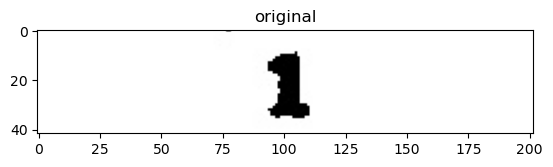

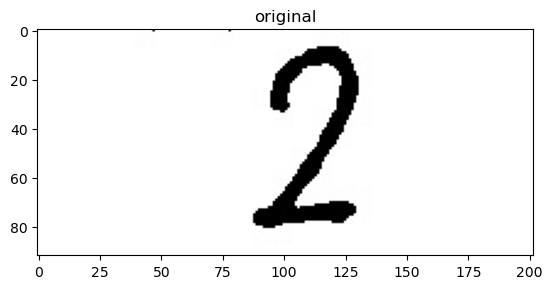

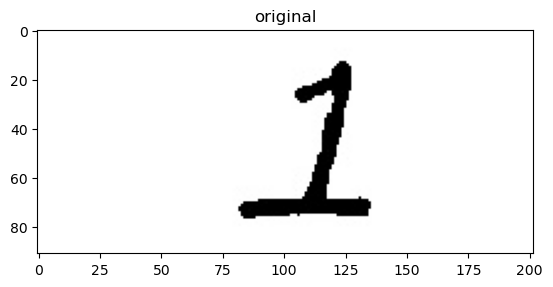

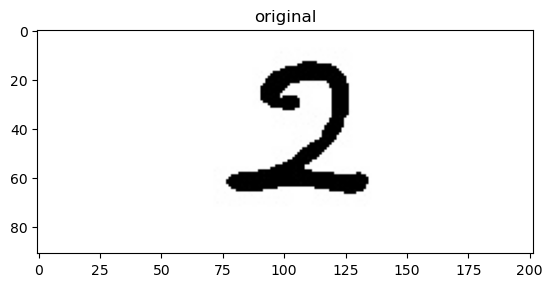

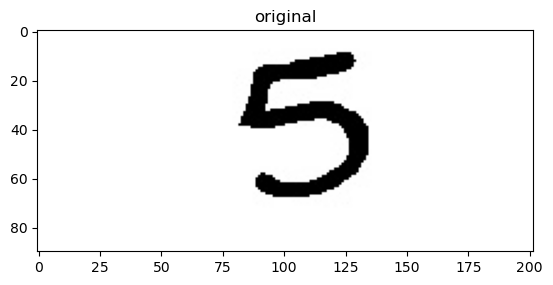

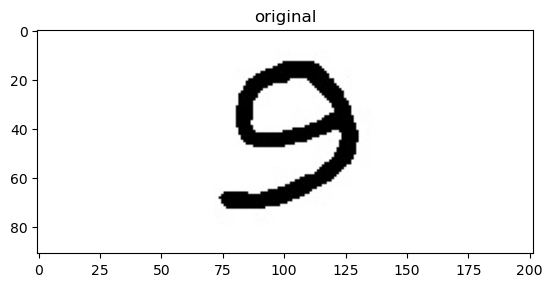

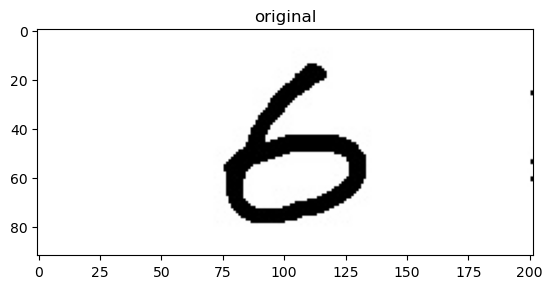

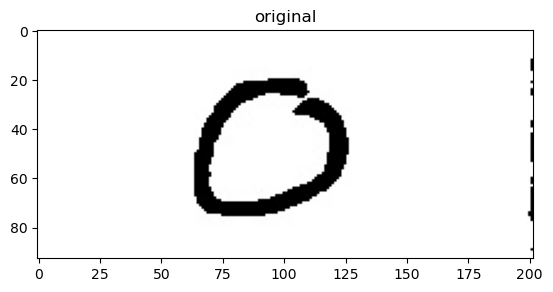

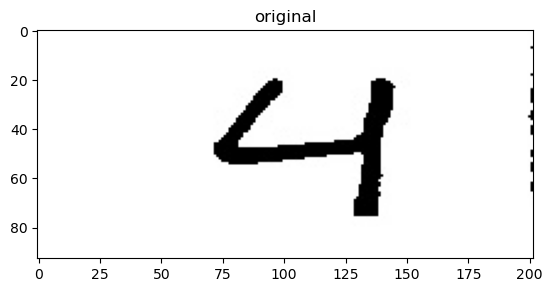

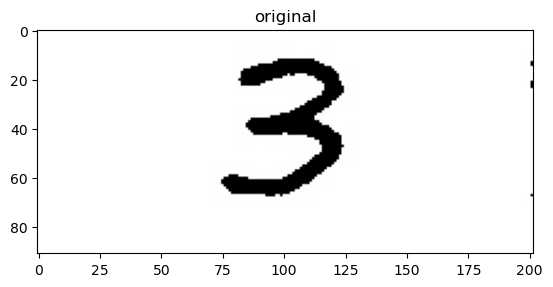

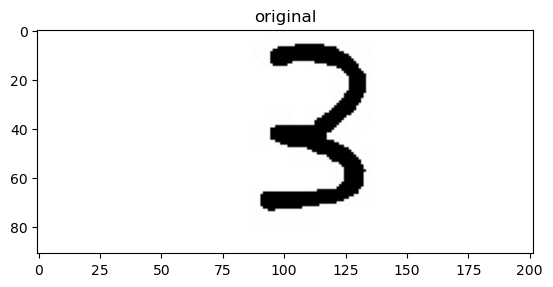

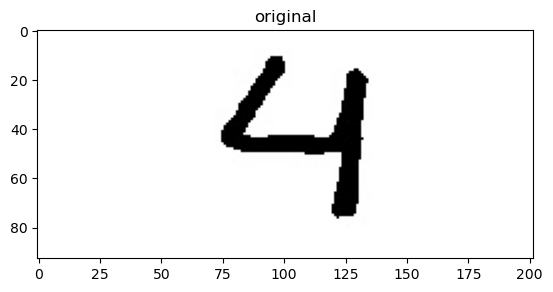

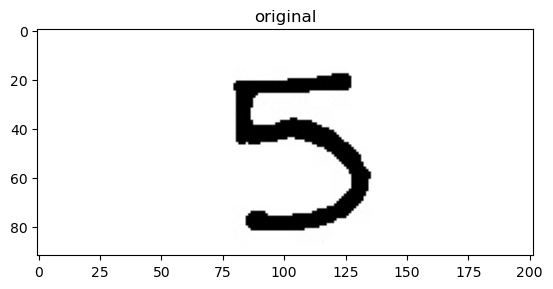

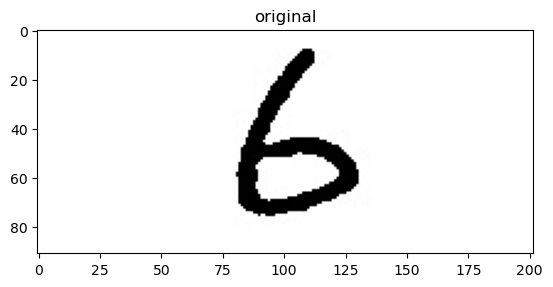

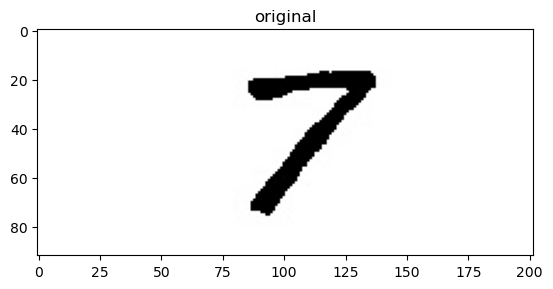

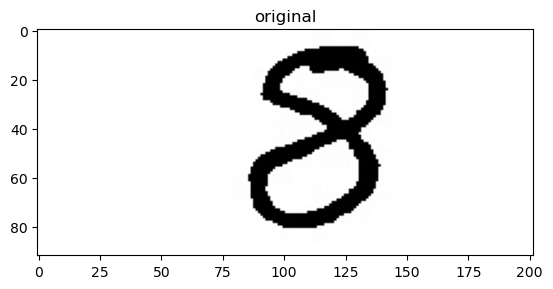

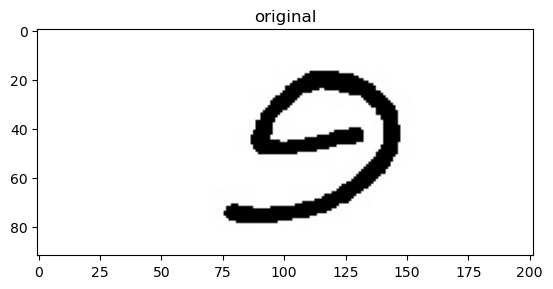

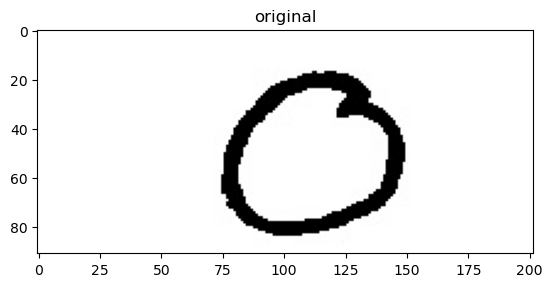

In [11]:
imgList = os.listdir('../../Results/Results/5/3')
print(imgList[:])
imgsPath = "../../Results/Results/5/3/"
imgs = []
warped_path = "./warpedImgs/"
for imgName in imgList:   
    img = cv2.imread(imgsPath+imgName)
    imgs.append(img)
    show_images([img], ['original'])

imgs_original = imgs[:]

In [19]:
svc_predictions = []
knn_predictions = []
rf_predictions = []
lr_predictions = []
final_predictions = []
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

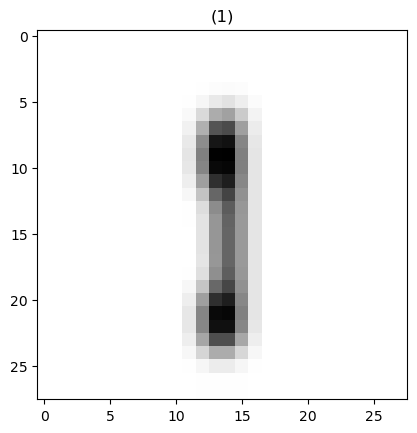

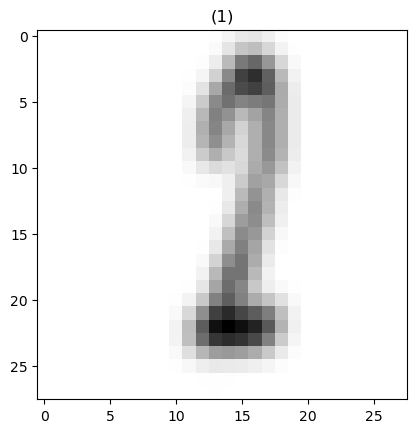

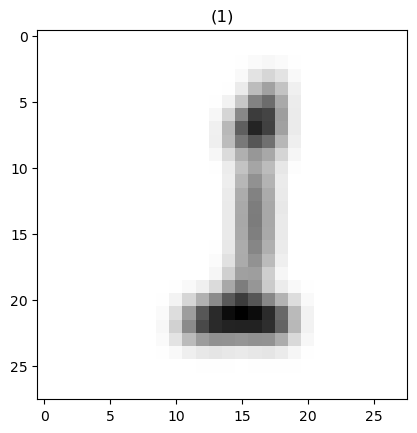

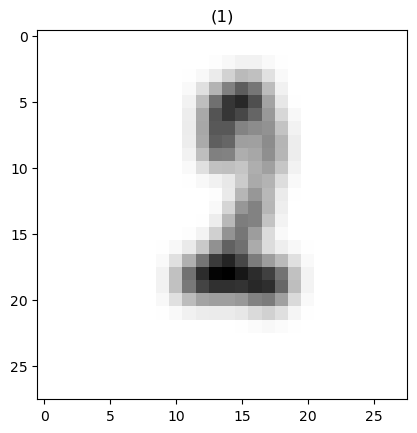

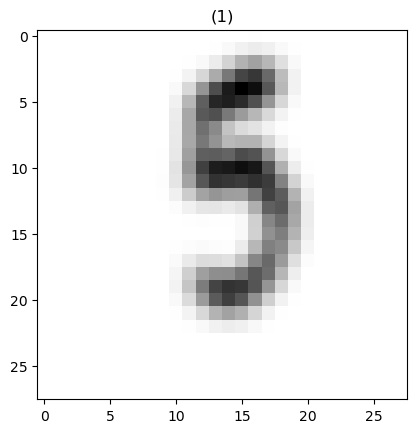

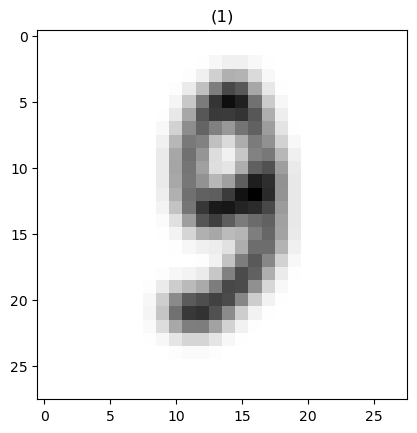

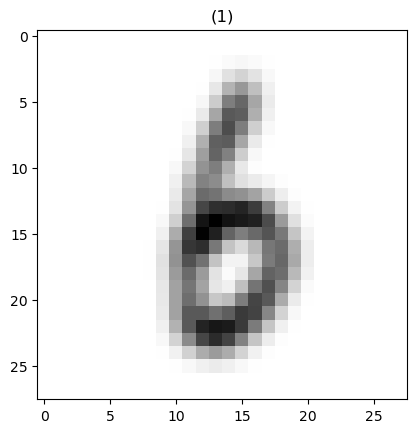

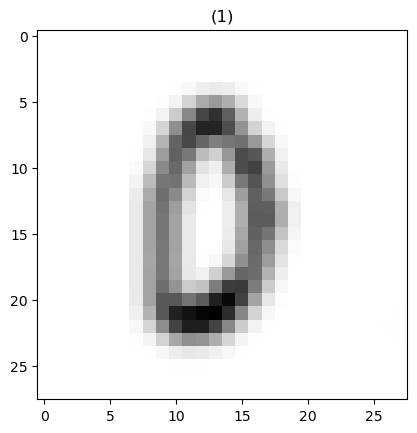

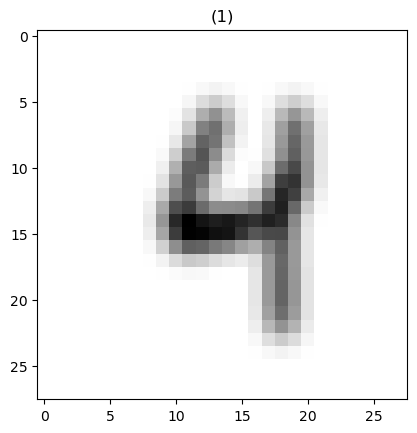

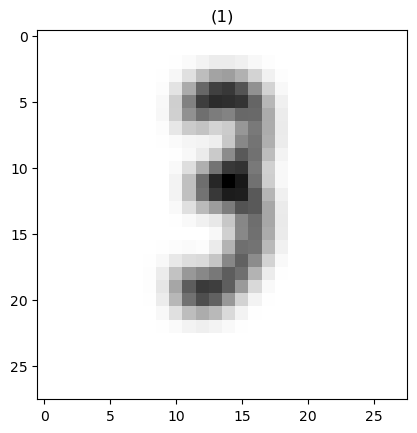

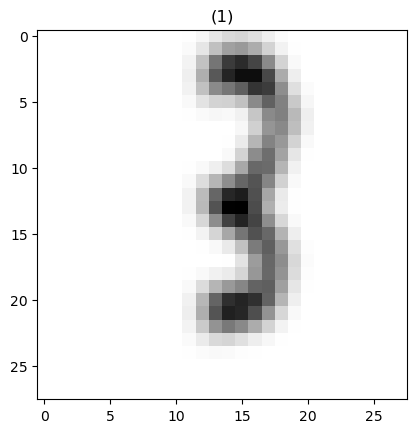

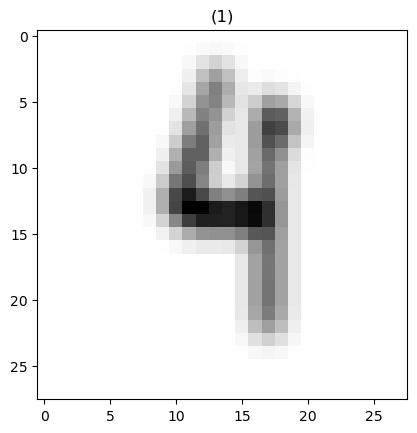

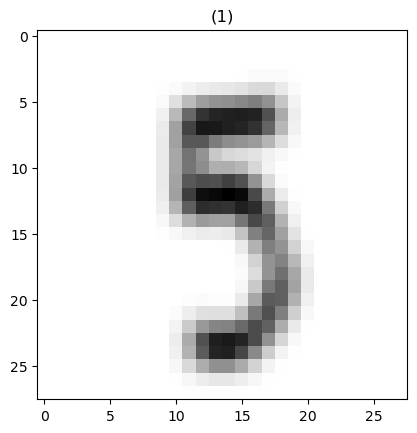

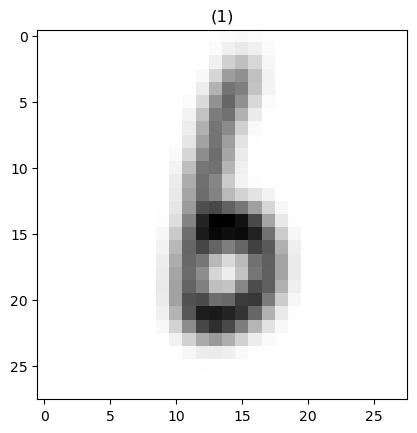

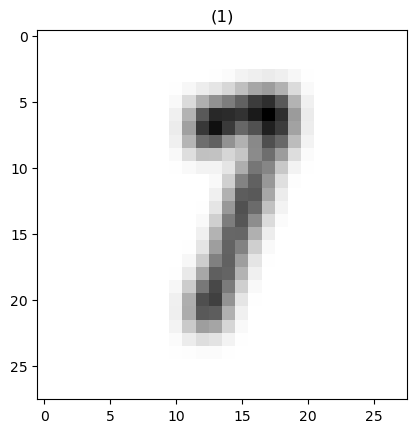

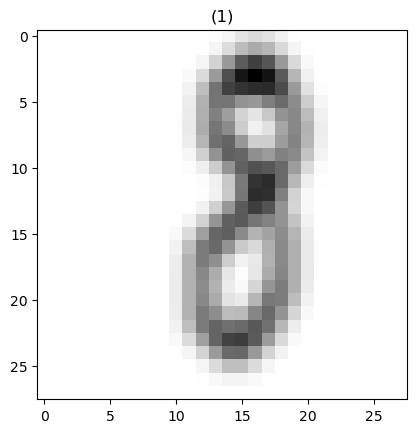

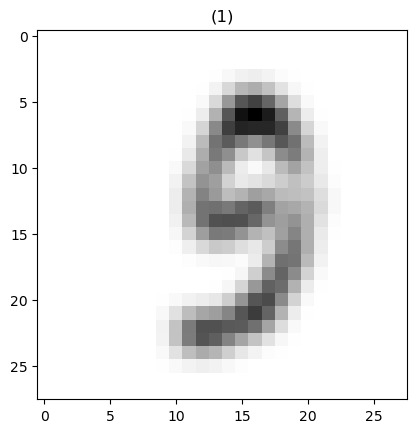

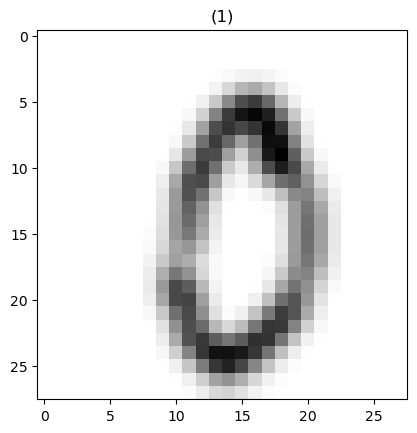

In [20]:
weights = [1,1,16,49,1,11,1,100,5,25]
for img in imgs:
    classifiers_respond = np.zeros(10)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_LANCZOS4|cv2.INTER_NEAREST)
    img = cv2.GaussianBlur(img, (5,5),0)
#     img = cv2.bilateralFilter(img, 20, 40, 40)
    show_images([img])
    hog_of_img = np.array(extract_hog_features(img))
    hog_of_img = hog_of_img.reshape(1,-1)
    value_SVC = loaded_svc.predict(hog_of_img)
    value_KNN = loaded_knn.predict(hog_of_img)
    value_RF = loaded_rf.predict(hog_of_img)
    value_LR = loaded_lr.predict(hog_of_img)
    svc_predictions.append(value_SVC)
    knn_predictions.append(value_KNN)
    rf_predictions.append(value_RF)
    lr_predictions.append(value_LR)
    classifiers_respond[int(value_SVC)] = classifiers_respond[int(value_SVC)] + weights[int(value_SVC)]
    classifiers_respond[int(value_KNN)] = classifiers_respond[int(value_KNN)] + weights[int(value_KNN)]
    classifiers_respond[int(value_RF)] = classifiers_respond[int(value_RF)] + weights[int(value_RF)]
    classifiers_respond[int(value_LR)] = classifiers_respond[int(value_LR)] + weights[int(value_LR)]
    final_predictions.append([str(np.argmax(classifiers_respond))])


In [21]:
svc_predictions = np.concatenate( svc_predictions, axis=0 )
print('Svc: ',svc_predictions)

Svc:  ['1' '1' '1' '8' '5' '9' '6' '0' '4' '3' '3' '4' '5' '6' '1' '8' '5' '0']


In [22]:
knn_predictions = np.concatenate( knn_predictions, axis=0 )
print('Knn: ', str(knn_predictions))

Knn:  ['1' '1' '1' '8' '5' '9' '6' '0' '4' '3' '3' '4' '5' '6' '1' '8' '5' '0']


In [23]:
rf_predictions = np.concatenate( rf_predictions, axis=0 )
print('RF: ', str(rf_predictions))

RF:  ['1' '1' '1' '8' '5' '9' '6' '0' '4' '3' '3' '4' '5' '6' '1' '8' '5' '0']


In [24]:
lr_predictions = np.concatenate(lr_predictions, axis = 0)
print('LR: ', str(lr_predictions))

LR:  ['1' '1' '1' '8' '5' '9' '6' '0' '4' '3' '3' '4' '5' '6' '1' '8' '5' '0']


In [25]:
final_predictions = np.concatenate(final_predictions, axis = 0)
print('FINAL : ', str(final_predictions))

FINAL :  ['1' '1' '1' '8' '5' '9' '6' '0' '4' '3' '3' '4' '5' '6' '1' '8' '5' '0']


In [98]:
def extract_the_paper_from_image(image):
#         gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         adaptively_thresholded = cv2.adaptiveThreshold(gray_scale,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
        contours, _ = cv2.findContours(image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        if (len(contours) > 0):
            contours = sorted(contours, key=cv2.contourArea, reverse=True)
            paper_contour = None
            paper = image
            for cnt in contours:
                peri = cv2.arcLength(cnt, True)
                ratio = 0.01
                approx = cv2.approxPolyDP(cnt, ratio*peri, True)
                print(len(approx),cv2.contourArea(cnt), image.shape[0]*image.shape[1])
                if (len(approx) == 4 and cv2.contourArea(cnt)>0.2*image.shape[0]*image.shape[1]):
                    paper_contour = approx
                    paper = four_point_transform(image, paper_contour.reshape(4, 2))
                else:
                    break
        return paper

In [257]:
def classifier_algorithm (myc, average_area, image):
    strFinalString=""
    print(strFinalString)
    [intX, intY, intW, intH] = cv2.boundingRect(myc)
    imgROI = image[intY:intY+intH, intX:intX+intW]
    print(cv2.contourArea(myc),average_area)
    if(cv2.contourArea(myc)>1.9*average_area):
        print('connected contours found')
        erosion = cv2.erode(imgROI, np.ones((2, 2), np.uint8),iterations=1)
        show_images([erosion], ['after erosion'])
        connected_contours,_ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        connected_contours,_=imcnts.sort_contours(connected_contours,method='left-to-right')
        print(len(connected_contours))
        for connected_contour in connected_contours:
            strFinalString = strFinalString + classifier_algorithm(connected_contour, average_area,erosion)
    else:
        imgROIResized = cv2.resize(imgROI, (28, 28), cv2.INTER_NEAREST)

        show_images([imgROIResized], ['test Sample'])

        finalResized = imgROIResized.reshape((-1,1))

    #     finalResized = np.float32(finalResized)
        hog_of_img = np.asarray(extract_hog_features(imgROIResized))
        hog_of_img = hog_of_img.reshape(1,-1)
        knn_value = knn.predict(hog_of_img)
        rf_value = rf.predict(hog_of_img)
        svc_value = clf.predict(hog_of_img)
        lr_value = lr.predict(hog_of_img)
        print(knn_value, rf_value, svc_value, lr_value)
        tmpString = str(int(knn_value))
        print(strFinalString)
        print(tmpString)
        strFinalString = strFinalString + tmpString
    return strFinalString

In [258]:
# imgTestSample = cv2.imread("../../Results/Results/9/0/13.jpg")
# #th = imgTestSample 
# #th=np.invert(th)
# bf = cv2.bilateralFilter(imgTestSample, 50, 100, 100) #to remove noise
# imgGray = cv2.cvtColor(bf, cv2.COLOR_BGR2GRAY)

In [259]:
# th = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7 , 3)
# th=np.invert(th)
# show_images([th], ['test sample'])
# imgDigit = th

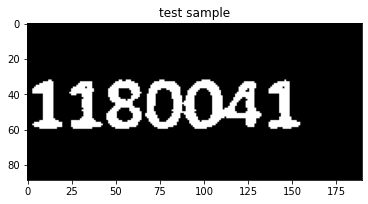

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
21 1187.5 16910


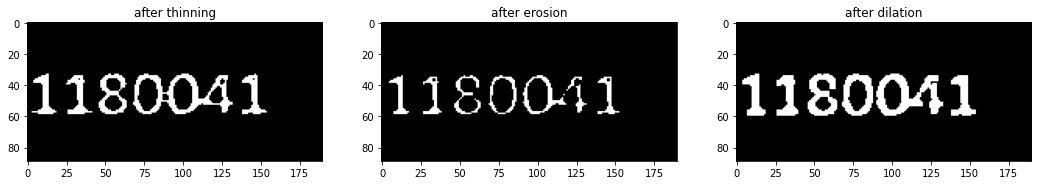

5

192.0 197.5


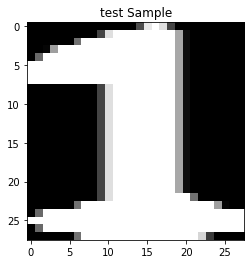

['1'] ['1'] ['1'] ['1']

1

197.5 197.5


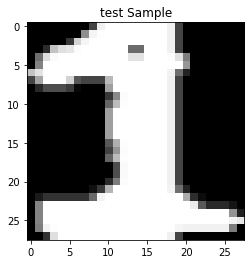

['4'] ['1'] ['4'] ['1']

4

392.0 197.5
connected contours found


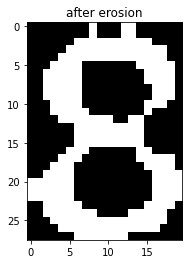

1

340.0 197.5


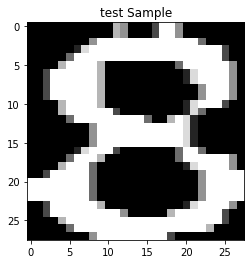

['8'] ['8'] ['8'] ['2']

8

1187.5 197.5
connected contours found


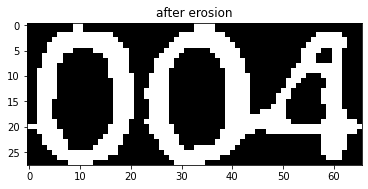

2

392.0 197.5
connected contours found


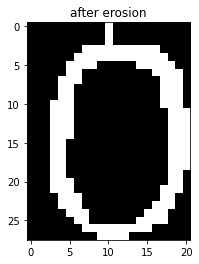

1

347.0 197.5


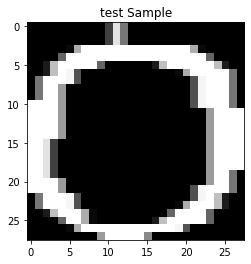

['0'] ['0'] ['0'] ['0']

0

646.0 197.5
connected contours found


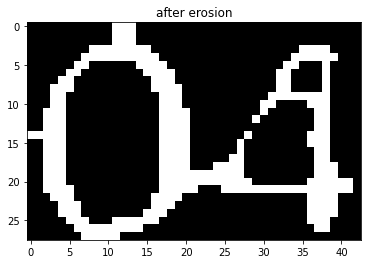

1

458.5 197.5
connected contours found


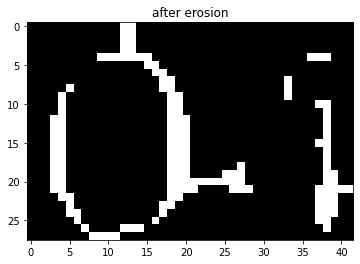

5

12.0 197.5


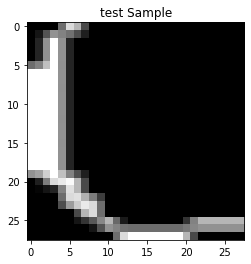

['1'] ['1'] ['6'] ['6']

1

41.5 197.5


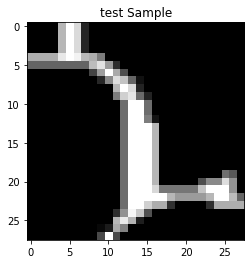

['1'] ['1'] ['1'] ['1']

1

0.0 197.5


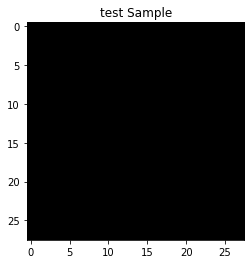

['1'] ['1'] ['1'] ['1']

1

0.0 197.5


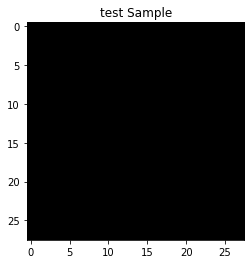

['1'] ['1'] ['1'] ['1']

1

13.5 197.5


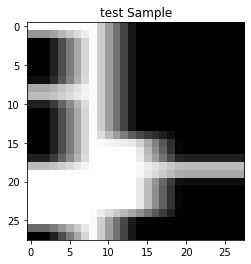

['1'] ['4'] ['4'] ['4']

1

197.5 197.5


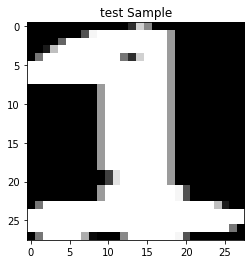

['1'] ['1'] ['1'] ['1']

1


In [264]:
imgTestSample = cv2.imread("../../Results/Results/9/0/7.jpg")
#th = imgTestSample 
#th=np.invert(th)
bf = cv2.bilateralFilter(imgTestSample, 50, 100, 100) #to remove noise
imgGray = cv2.cvtColor(bf, cv2.COLOR_BGR2GRAY)





th = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,7 , 3)
th=np.invert(th)
show_images([th], ['test sample'])
imgDigit = th






strFinalString = ""


#imgTestSample = cv2.imread("id dataset/test_image/7.png")
#skeleton = skeletonize(imgDigit/255)
thinned_img = thin(imgDigit,1)
print(thinned_img)
thinned_img = thinned_img.astype('uint8')
erosion = cv2.erode(thinned_img, np.ones((2, 2), np.uint8),iterations=1)
dilation = cv2.dilate(erosion, np.ones((3, 3), np.uint8),iterations=1)



imgDigit = extract_the_paper_from_image(imgDigit)
#show_images([thinned_img,erosion,dilation], ['after thinning','after erosion','after dilation'])







area_sum=[]
cntr, h = cv2.findContours(imgDigit, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in cntr:
    area_sum = np.append(area_sum , [cv2.contourArea(cnt)])
average_area=area_sum/len(cntr)

average_area = statistics.median(area_sum)
    
cntr,_=imcnts.sort_contours(cntr,method='left-to-right')
print(len(cntr))
for myc in cntr:
    strFinalString = strFinalString + classifier_algorithm(myc, average_area,imgDigit)

In [265]:
print(strFinalString)  

1480111111
